In [7]:
import pandas as pd


Coefficients: [5.79120525 1.67090445 1.92970613]
Intercept: -435.5672296133219
Mean Squared Error: 4354.413282161512
R-squared: 0.8664689420685995


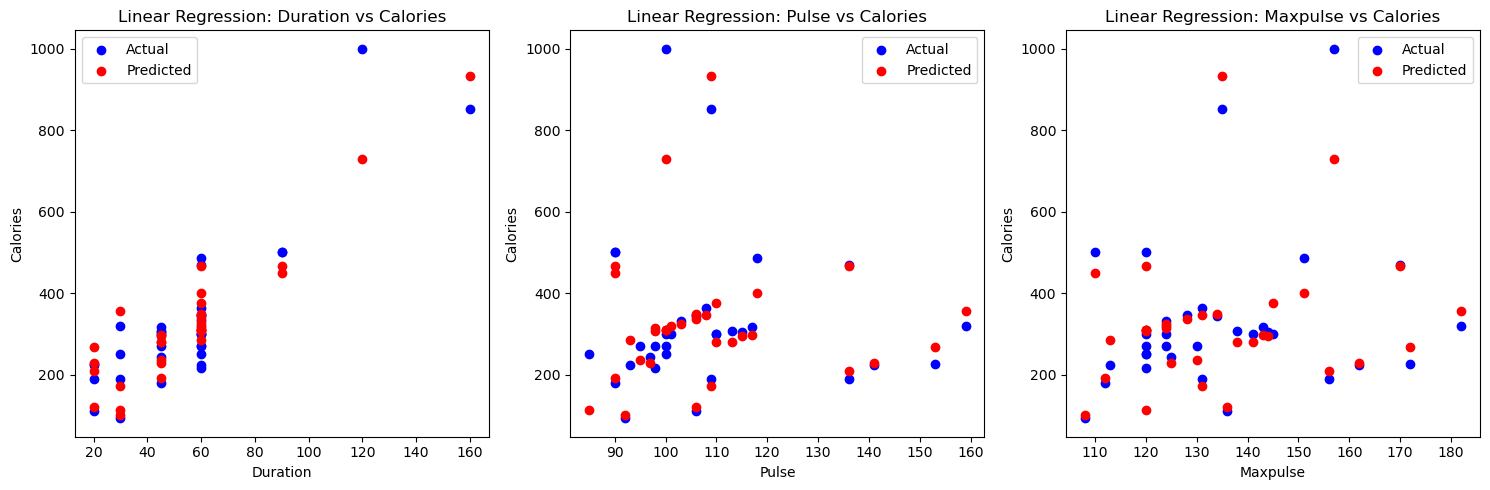

In [44]:
# Import libraries (only once)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read and clean data
df = pd.read_csv("data.csv")
df.dropna(inplace=True)

# Correct way to select multiple columns using a list
X = df[['Duration', 'Pulse', 'Maxpulse']]  # independent variables
Y = df['Calories']  # dependent variable

# Correct order of parameters in train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Correct initialization of LinearRegression model with parentheses
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print results
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
features = ['Duration', 'Pulse', 'Maxpulse']

for i, feature in enumerate(features):
    axes[i].scatter(X_test[feature], Y_test, color='blue', label='Actual')
    axes[i].scatter(X_test[feature], Y_pred, color='red', label='Predicted')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Calories')
    axes[i].set_title(f'Linear Regression: {feature} vs Calories')
    axes[i].legend()

plt.tight_layout()
plt.show()